<a href="https://colab.research.google.com/github/Adolfo-AB/learning-machine-learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model
Implementing a Linear Regression model with Gradient Descent.

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import math

SIZE = 50

In [160]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

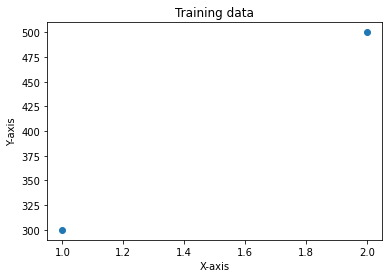

In [161]:
# Create a new figure
plt.figure()

# Plot the vectors
plt.scatter(x_train, y_train)

# Add a title and axis labels
plt.title('Training data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()

In [162]:
NUM_ITERATIONS = 100

def compute_cost(x, y, w, b):
  m = x.shape[0] 
  cost = 0
  
  for i in range(m):
      f_wb = w * x[i] + b
      cost = cost + (f_wb - y[i])**2
  total_cost = 1 / (2 * m) * cost

  return total_cost

def compute_gradient(x, y, w, b): 
  m = x.shape[0]
  w_gradient = 0
  b_gradient = 0

  for i in range(m):
    prediction = w*x[i] + b
    w_gradient_temp = (prediction-y[i])*x[i]
    b_gradient_temp = (prediction-y[i])
    w_gradient += w_gradient_temp
    b_gradient += b_gradient_temp

  return w_gradient/m, b_gradient/m

def gradient_descent(x, y, w_in=0, b_in=0, alpha=0.000001, num_iters=NUM_ITERATIONS, cost_function=compute_cost, gradient_function=compute_gradient):
  cost_history = []
  parameters_history = []
  b = b_in
  w = w_in 

  for i in range(num_iters):
    w_gradient, b_gradient = gradient_function(x, y, w, b)
    w -= alpha*w_gradient
    b -= alpha*b_gradient
    cost_history.append(cost_function(x, y, w, b))
    parameters_history.append((w, b))

  return w, b, cost_history, parameters_history

In [163]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (199.9929,100.0116)


[1.         1.02040816 1.04081633 1.06122449 1.08163265 1.10204082
 1.12244898 1.14285714 1.16326531 1.18367347 1.20408163 1.2244898
 1.24489796 1.26530612 1.28571429 1.30612245 1.32653061 1.34693878
 1.36734694 1.3877551  1.40816327 1.42857143 1.44897959 1.46938776
 1.48979592 1.51020408 1.53061224 1.55102041 1.57142857 1.59183673
 1.6122449  1.63265306 1.65306122 1.67346939 1.69387755 1.71428571
 1.73469388 1.75510204 1.7755102  1.79591837 1.81632653 1.83673469
 1.85714286 1.87755102 1.89795918 1.91836735 1.93877551 1.95918367
 1.97959184 2.        ]


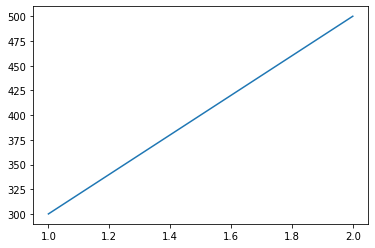

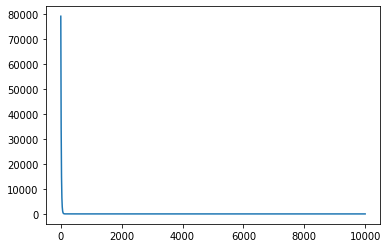

In [164]:
x_plot = np.linspace(min(x_train), max(x_train))
print(x_plot)
y_plot = w_final*x_plot + b_final
plt.plot(x_plot, y_plot)
plt.show()

plt.plot(J_hist)
plt.show()